In [1]:
from keras import backend as K
from keras.models import Sequential, Model
from keras.layers import Activation
from keras.layers import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from keras.utils import plot_model
import numpy
import tensorflow as tf
import keras
import seaborn as sns
import pandas as pd
import numpy as np
import linecache
import sys
import h5py
import itertools
import matplotlib.pyplot as plt
import os
import pickle
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
from keras.callbacks import ModelCheckpoint
from keras.callbacks import TensorBoard
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import EarlyStopping
from keras.callbacks import RemoteMonitor
from numpy import argmax
import numpy as np
from numpy.random import RandomState
np.random.seed(1)
#from sklearn.manifold import TSNE

from collections import OrderedDict


from tsne import bh_sne
#from tsne.bh_sne import BH_SNE
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import os
import os.path
import glob

from keras.preprocessing import image
from keras.applications.vgg16 import VGG16
from keras.applications.imagenet_utils import preprocess_input

import os
import os.path
import glob

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold                                                                                                                       
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn import svm

import matplotlib.pyplot as plt
import matplotlib.cm as colormap
plt.rcParams['image.cmap'] = 'Paired'

import numpy as np
np.random.seed(1)

from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.utils import np_utils
#from PIL import Image
from keras.preprocessing import image


from keras.applications.vgg19 import VGG19
from keras.applications.vgg16 import VGG16
from keras.applications.imagenet_utils import preprocess_input

Using TensorFlow backend.


In [2]:
tf.__version__

'1.9.0'

In [3]:
X = np.load("/data/danish/ImgProPython/TensorFlow-Tutorials/Ensemble-Networks/IMCEC(Paper Expriments)/Computer-and-Security(IMCEC-version1)/DatasetX.npy")
y = np.load("/data/danish/ImgProPython/TensorFlow-Tutorials/Ensemble-Networks/IMCEC(Paper Expriments)/Computer-and-Security(IMCEC-version1)/Datasety.npy")
print(X.shape)
print(y.shape)


file = open('/data/danish/ImgProPython/TensorFlow-Tutorials/Ensemble-Networks/IMCEC(Paper Expriments)/Computer-and-Security(IMCEC-version1)/list_fams.pkl', 'rb')
list_fams = pickle.load(file)
file.close()

(9339, 224, 224, 3)
(9339,)


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.301, random_state=42)

In [5]:
test_path  = '/data/danish/Data/Malimg-Gray-25-Families/Malimg_Grayscale_test/'

In [6]:
input_shape=(224,224)
batch_size=64
#save_fn='VGG16-Color='+str(input_shape[:])
#save_fn

In [7]:
datagen_test = ImageDataGenerator(rescale=1./255)

generator_test = datagen_test.flow_from_directory(directory=test_path,
                                                  target_size=input_shape,
                                                  class_mode='categorical',
                                                  #color_mode="rgb",
                                                  #save_prefix='Test_Aug',
                                                  batch_size=batch_size,
                                                  shuffle=False,
                                                  seed=42)

steps_test = generator_test.n / batch_size
print("Steps for Test\n\n",steps_test)

cls_test = generator_test.classes
print("Labels of samples as integer\n\n",cls_test)

Found 2812 images belonging to 25 classes.
Steps for Test

 43.9375
Labels of samples as integer

 [ 0  0  0 ..., 24 24 24]


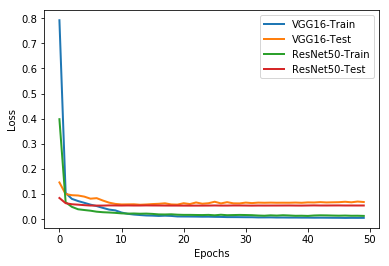

In [8]:
# read Traning History back from the file
pkl_file = open('/data/danish/ImgProPython/TensorFlow-Tutorials/Ensemble-Networks/IMCEC(Paper Expriments)/Computer-and-Security(IMCEC-version1)/VGG16-FT-Softmax/VGG16-FT-Softmax-history.pkl', 'rb')
VGG16 = pickle.load(pkl_file)
pkl_file.close()
# read Traning History back from the file
pkl_file = open('/data/danish/ImgProPython/TensorFlow-Tutorials/Ensemble-Networks/IMCEC(Paper Expriments)/Computer-and-Security(IMCEC-version1)/ResNet-FT-Softmax/ResNet50-FT-Softmax-history.pkl', 'rb')
ResNet50 = pickle.load(pkl_file)
pkl_file.close()


#plt.title('Loss')
plt.plot(VGG16['loss'], label='VGG16-Train', linewidth=2)
plt.plot(VGG16['val_loss'], label='VGG16-Test', linewidth=2)
plt.plot(ResNet50['loss'], label='ResNet50-Train',linewidth=2)
plt.plot(ResNet50['val_loss'], label='ResNet50-Test',linewidth=2)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

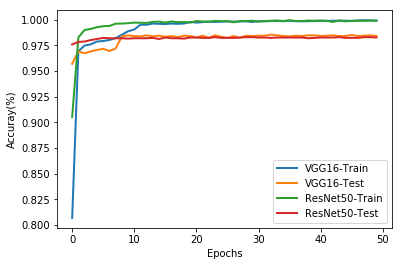

In [9]:
#plt.title('Accuracy')
plt.plot(VGG16['acc'], label='VGG16-Train',linewidth=2)
plt.plot(VGG16['val_acc'], label='VGG16-Test',linewidth=2)
plt.plot(ResNet50['acc'], label='ResNet50-Train',linewidth=2)
plt.plot(ResNet50['val_acc'], label='ResNet50-Test',linewidth=2)
plt.xlabel('Epochs')
plt.ylabel('Accuray(%)')
plt.legend()
plt.show()

In [19]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

#Ensemble_precision, Ensemble_recall, Ensemble_f1_score, _ = precision_recall_fscore_support(y_test, yhat, average=None)

file = open('/data/danish/ImgProPython/TensorFlow-Tutorials/Ensemble-Networks/IMCEC(Paper Expriments)/Computer-and-Security(IMCEC-version1)/Ensemble/CM_Ensemble.pkl', 'rb')
Ensemble = pickle.load(file)
file.close()


file = open('/data/danish/ImgProPython/TensorFlow-Tutorials/Ensemble-Networks/IMCEC(Paper Expriments)/Computer-and-Security(IMCEC-version1)/VGG16-TL-SVM/CM_VGG16_TL_SVM.pkl', 'rb')
VGG16_TL_SVM = pickle.load(file)
file.close()
#VGG16_TL_SVM_precision, VGG16_TL_SVM_recall, VGG16_TL_SVM_f1_score, _ = precision_recall_fscore_support(y_test, VGG16_TL_SVM, average=None)


file = open('/data/danish/ImgProPython/TensorFlow-Tutorials/Ensemble-Networks/IMCEC(Paper Expriments)/Computer-and-Security(IMCEC-version1)/VGG16-FT-Softmax/CM_VGG16_FT_Softmax.pkl', 'rb')
VGG16_FT_Softmax = pickle.load(file)
file.close()
#VGG16_FT_Softmax_precision, VGG16_FT_Softmax_recall, VGG16_FT_Softmax_f1_score, _ = precision_recall_fscore_support(y_test, VGG16_FT_Softmax, average=None)

file = open('/data/danish/ImgProPython/TensorFlow-Tutorials/Ensemble-Networks/IMCEC(Paper Expriments)/Computer-and-Security(IMCEC-version1)/VGG16-FT-SVM/CM_VGG16_FT_SVM.pkl', 'rb')
VGG16_FT_SVM = pickle.load(file)
file.close()
#VGG16_FT_Softmax_precision, VGG16_FT_Softmax_recall, VGG16_FT_Softmax_f1_score, _ = precision_recall_fscore_support(y_test, VGG16_FT_Softmax, average=None)

file = open('/data/danish/ImgProPython/TensorFlow-Tutorials/Ensemble-Networks/IMCEC(Paper Expriments)/Computer-and-Security(IMCEC-version1)/ResNet-TL-SVM/CM_ResNet_TL_SVM.pkl', 'rb')
ResNet_TL_SVM = pickle.load(file)
file.close()
#ResNet_TL_SVM_precision, ResNet_TL_SVM_recall, ResNet_TL_SVM_f1_score, _ = precision_recall_fscore_support(y_test, ResNet_TL_SVM, average=None)


file = open('/data/danish/ImgProPython/TensorFlow-Tutorials/Ensemble-Networks/IMCEC(Paper Expriments)/Computer-and-Security(IMCEC-version1)/ResNet-FT-Softmax/CM_ResNet_FT_Softmax.pkl', 'rb')
ResNet_FT_Softmax = pickle.load(file)
file.close()
#ResNet_FT_Softmax_precision, ResNet_FT_Softmax_recall, ResNet_FT_Softmax_f1_score, _ = precision_recall_fscore_support(y_test, ResNet_FT_Softmax, average=None)

file = open('/data/danish/ImgProPython/TensorFlow-Tutorials/Ensemble-Networks/IMCEC(Paper Expriments)/Computer-and-Security(IMCEC-version1)/ResNet-FT-SVM/CM_ResNet_FT_SVM.pkl', 'rb')
ResNet_FT_SVM = pickle.load(file)
file.close()
#file = open('VGG16-ResNet50-TL+SVM(pred).pkl', 'rb')
#VGG16_ResNet_TL_SVM = pickle.load(file)
#file.close()
#VGG16_ResNet_TL_SVM_precision, VGG16_ResNet_TL_SVM_recall, VGG16_ResNet_TL_SVM_f1_score, _ = precision_recall_fscore_support(y_test, VGG16_ResNet_TL_SVM, average=None)




# Accuracy


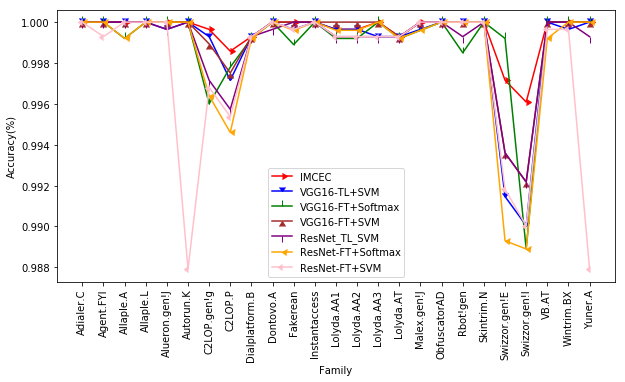

In [24]:


plt.figure(figsize = (10,5))


ACC_Ensemble = Ensemble.ACC.items()
x, y = zip(*ACC_Ensemble)
plt.plot(x,y, Color='red', label='IMCEC', marker=9)



ACC_VGG16_TL_SVM = VGG16_TL_SVM.ACC.items()
x1, y1 = zip(*ACC_VGG16_TL_SVM)
plt.plot(x1,y1, Color='blue',label='VGG16-TL+SVM', marker=7)

ACC_VGG16_FT_Softmax = VGG16_FT_Softmax.ACC.items()
x2 = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]
y2 = [1,1,0.9992,1,1,1,0.9960,0.9978,0.9992,1,0.9989,1,0.9992,0.9992,1,0.9992,0.9996,1,0.9985,1,0.9992,0.9889,1,1,1,]
#x2, y2 = zip(*ACC_VGG16_FT_Softmax)
plt.plot(x2,y2, Color='green', label='VGG16-FT+Softmax', marker=2)

ACC_VGG16_FT_SVM = VGG16_FT_SVM.ACC.items()
x3, y3 = zip(*ACC_VGG16_FT_SVM)
plt.plot(x3,y3, Color='brown',label='VGG16-FT+SVM', marker=6)





ACC_ResNet_TL_SVM = ResNet_TL_SVM.ACC.items()
x4, y4 = zip(*ACC_ResNet_TL_SVM)
plt.plot(x4,y4,Color='purple', label='ResNet_TL_SVM', marker=3)


ACC_ResNet_FT_Softmax = ResNet_FT_Softmax.ACC.items()
x5 = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]
y5 = [1,1,0.9992,1,1,1,0.9964,0.9946,0.9992,1,0.9996,1,0.9996,0.9996,1,0.9992,0.9996,1,1,1,0.9893,0.9889,0.9992,1,1]
#x4, y4 = zip(*ACC_ResNet_FT_Softmax)
plt.plot(x5,y5, Color='orange',label='ResNet-FT+Softmax',marker=4)


ACC_ResNet_FT_SVM = ResNet_FT_SVM.ACC.items()
x6, y6 = zip(*ACC_ResNet_FT_SVM)
plt.plot(x6,y6,Color='pink', label='ResNet-FT+SVM', marker=8)





#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 20])
plt.xticks(np.arange(25), list_fams, rotation=90)
plt.xlabel('Family')
plt.ylabel('Accuracy(%)')
plt.legend()

plt.show()

# False Positive

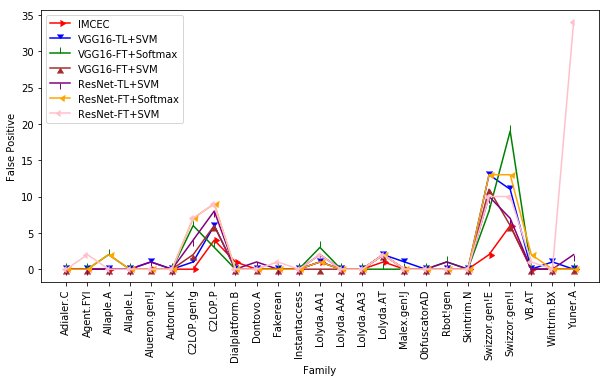

In [25]:
plt.figure(figsize = (10,5))


FP_Ensemble = Ensemble.FP.items()
x, y = zip(*FP_Ensemble)
plt.plot(x,y, Color='red', label='IMCEC', marker=9)



FP_VGG16_TL_SVM = VGG16_TL_SVM.FP.items()
x1, y1 = zip(*FP_VGG16_TL_SVM)
plt.plot(x1,y1, Color='blue', label='VGG16-TL+SVM', marker=7)

#FP_VGG16_FT_Softmax = VGG16_FT_Softmax.FP.items()
x2 = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]
y2 = [0,0,2,0,0,0,6,3,0,0,0,0,3,0,0,0,0,0,1,0,8,19,0,0,0]
#x2, y2 = zip(*FP_VGG16_FT_Softmax)
plt.plot(x2,y2, Color='green', label='VGG16-FT+Softmax', marker=2)




FP_VGG16_FT_SVM = VGG16_FT_SVM.FP.items()
x3, y3 = zip(*FP_VGG16_FT_SVM)
plt.plot(x3,y3, Color='brown', label='VGG16-FT+SVM', marker=6)





FP_ResNet_TL_SVM = ResNet_TL_SVM.FP.items()
x4, y4 = zip(*FP_ResNet_TL_SVM)
plt.plot(x4,y4,Color='purple',label='ResNet-TL+SVM', marker=3)


FP_ResNet_FT_Softmax = ResNet_FT_Softmax.FP.items()
x5 = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]
y5 = [0,0,2,0,0,0,7,9,0,0,0,0,1,0,0,2,0,0,0,0,13,13,2,0,0]
plt.plot(x5,y5, Color='orange', label='ResNet-FT+Softmax',marker=4)



FP_ResNet_FT_SVM = ResNet_FT_SVM.FP.items()
x6, y6 = zip(*FP_ResNet_FT_SVM)
plt.plot(x6,y6, Color='pink',label='ResNet-FT+SVM', marker=8)





#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 20])
plt.xticks(np.arange(25), list_fams, rotation=90)
plt.xlabel('Family')
plt.ylabel('False Positive')
plt.legend()

plt.show()

In [26]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

#Ensemble_precision, Ensemble_recall, Ensemble_f1_score, _ = precision_recall_fscore_support(y_test, yhat, average=None)

file = open('/data/danish/ImgProPython/TensorFlow-Tutorials/Ensemble-Networks/IMCEC(Paper Expriments)/Computer-and-Security(IMCEC-version1)/Ensemble/Ensemble(pred).pkl', 'rb')
Ensemble = pickle.load(file)
file.close()
Ensemble_precision, Ensemble_recall, Ensemble_f1_score, _ = precision_recall_fscore_support(y_test, Ensemble, average=None)


file = open('/data/danish/ImgProPython/TensorFlow-Tutorials/Ensemble-Networks/IMCEC(Paper Expriments)/Computer-and-Security(IMCEC-version1)/VGG16-TL-SVM/VGG16-TL-SVM(pred).pkl', 'rb')
VGG16_TL_SVM = pickle.load(file)
file.close()
VGG16_TL_SVM_precision, VGG16_TL_SVM_recall, VGG16_TL_SVM_f1_score, _ = precision_recall_fscore_support(y_test, VGG16_TL_SVM, average=None)


file = open('/data/danish/ImgProPython/TensorFlow-Tutorials/Ensemble-Networks/IMCEC(Paper Expriments)/Computer-and-Security(IMCEC-version1)/VGG16-FT-Softmax/VGG16-FT-Softmax(pred).pkl', 'rb')
VGG16_FT_Softmax = pickle.load(file)
file.close()
VGG16_FT_Softmax_precision, VGG16_FT_Softmax_recall, VGG16_FT_Softmax_f1_score, _ = precision_recall_fscore_support(cls_test, VGG16_FT_Softmax, average=None)

file = open('/data/danish/ImgProPython/TensorFlow-Tutorials/Ensemble-Networks/IMCEC(Paper Expriments)/Computer-and-Security(IMCEC-version1)/VGG16-FT-SVM/VGG16-FT-SVM(pred).pkl', 'rb')
VGG16_FT_SVM = pickle.load(file)
file.close()
VGG16_FT_SVM_precision, VGG16_FT_SVM_recall, VGG16_FT_SVM_f1_score, _ = precision_recall_fscore_support(y_test, VGG16_FT_SVM, average=None)

file = open('/data/danish/ImgProPython/TensorFlow-Tutorials/Ensemble-Networks/IMCEC(Paper Expriments)/Computer-and-Security(IMCEC-version1)/ResNet-TL-SVM/ResNet-TL-SVM(pred).pkl', 'rb')
ResNet_TL_SVM = pickle.load(file)
file.close()
ResNet_TL_SVM_precision, ResNet_TL_SVM_recall, ResNet_TL_SVM_f1_score, _ = precision_recall_fscore_support(y_test, ResNet_TL_SVM, average=None)


file = open('/data/danish/ImgProPython/TensorFlow-Tutorials/Ensemble-Networks/IMCEC(Paper Expriments)/Computer-and-Security(IMCEC-version1)/ResNet-FT-Softmax/ResNet-FT-Softmax(pred).pkl', 'rb')
ResNet_FT_Softmax = pickle.load(file)
file.close()
ResNet_FT_Softmax_precision, ResNet_FT_Softmax_recall, ResNet_FT_Softmax_f1_score, _ = precision_recall_fscore_support(cls_test, ResNet_FT_Softmax, average=None)

file = open('/data/danish/ImgProPython/TensorFlow-Tutorials/Ensemble-Networks/IMCEC(Paper Expriments)/Computer-and-Security(IMCEC-version1)/ResNet-FT-SVM/ResNet-FT-SVM(pred).pkl', 'rb')
ResNet_FT_SVM = pickle.load(file)
file.close()
ResNet_FT_SVM_precision, ResNet_FT_SVM_recall, ResNet_FT_SVM_f1_score, danish = precision_recall_fscore_support(y_test, ResNet_FT_SVM, average=None)


# F1-Score

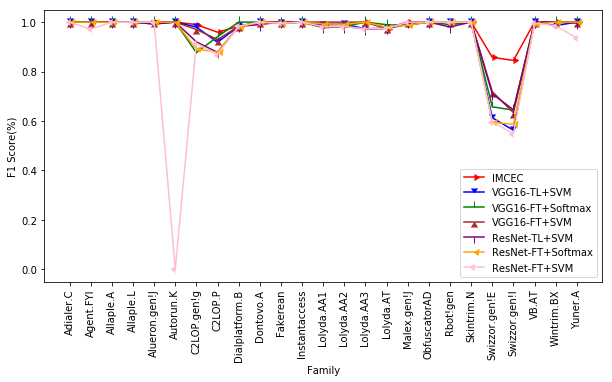

In [29]:
import collections


#plt.title('Accuracy')
plt.figure(figsize = (10,5))



plt.plot(Ensemble_f1_score, color='red' ,label='IMCEC', marker=9)

plt.plot(VGG16_TL_SVM_f1_score, color='blue', label='VGG16-TL+SVM', marker=7)
plt.plot(VGG16_FT_Softmax_f1_score, color='green',label='VGG16-FT+Softmax', marker=2)
plt.plot(VGG16_FT_SVM_f1_score, color='brown',label='VGG16-FT+SVM', marker=6)

plt.plot(ResNet_TL_SVM_f1_score,color='purple', label='ResNet-TL+SVM', marker=3)
plt.plot(ResNet_FT_Softmax_f1_score, color='orange',label='ResNet-FT+Softmax', marker=4)
plt.plot(ResNet_FT_SVM_f1_score, color='pink',label='ResNet-FT+SVM', marker=8)

#plt.plot(Ensemble_f1_score, color='red' ,label='Our Ensemble',linewidth=1, marker=9)
#plt.plot(Ensemble_f1_score, color='red' ,label='Our Ensemble',linewidth=1, marker=9)
#plt.plot(Ensemble_f1_score, color='red' ,label='Our Ensemble',linewidth=1, marker=9)



#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 20])
plt.xticks(np.arange(25), list_fams, rotation=90)
plt.xlabel('Family')
plt.ylabel('F1 Score(%)')
plt.legend()

plt.show()

# Precision

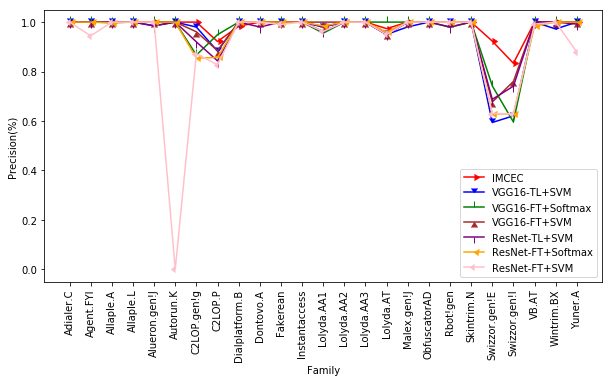

In [30]:
import collections


#plt.title('Accuracy')
plt.figure(figsize = (10,5))



plt.plot(Ensemble_precision, color='red' ,label='IMCEC', marker=9)

plt.plot(VGG16_TL_SVM_precision, color='blue', label='VGG16-TL+SVM', marker=7)
plt.plot(VGG16_FT_Softmax_precision, color='green',label='VGG16-FT+Softmax', marker=2)
plt.plot(VGG16_FT_SVM_precision,color='brown', label='VGG16-FT+SVM', marker=6)

plt.plot(ResNet_TL_SVM_precision, color='purple',label='ResNet-TL+SVM', marker=3)
plt.plot(ResNet_FT_Softmax_precision,color='orange', label='ResNet-FT+Softmax', marker=4)
plt.plot(ResNet_FT_SVM_precision, color='pink',label='ResNet-FT+SVM', marker=8)

#plt.plot(Ensemble_f1_score, color='red' ,label='Our Ensemble',linewidth=1, marker=9)
#plt.plot(Ensemble_f1_score, color='red' ,label='Our Ensemble',linewidth=1, marker=9)
#plt.plot(Ensemble_f1_score, color='red' ,label='Our Ensemble',linewidth=1, marker=9)



#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 20])
plt.xticks(np.arange(25), list_fams, rotation=90)
plt.xlabel('Family')
plt.ylabel('Precision(%)')
plt.legend()

plt.show()

# Recall

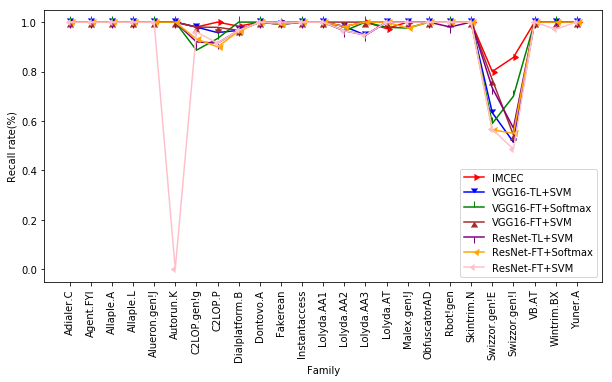

In [31]:
import collections


#plt.title('Accuracy')
plt.figure(figsize = (10,5))



plt.plot(Ensemble_recall, color='red' ,label='IMCEC', marker=9)

plt.plot(VGG16_TL_SVM_recall, color='blue', label='VGG16-TL+SVM', marker=7)
plt.plot(VGG16_FT_Softmax_recall, color='green',label='VGG16-FT+Softmax', marker=2)
plt.plot(VGG16_FT_SVM_recall, color='brown',label='VGG16-FT+SVM', marker=6)

plt.plot(ResNet_TL_SVM_recall, color='purple',label='ResNet-TL+SVM', marker=3)
plt.plot(ResNet_FT_Softmax_recall, color='orange',label='ResNet-FT+Softmax', marker=4)
plt.plot(ResNet_FT_SVM_recall, color='pink',label='ResNet-FT+SVM', marker=8)

#plt.plot(Ensemble_f1_score, color='red' ,label='Our Ensemble',linewidth=1, marker=9)
#plt.plot(Ensemble_f1_score, color='red' ,label='Our Ensemble',linewidth=1, marker=9)
#plt.plot(Ensemble_f1_score, color='red' ,label='Our Ensemble',linewidth=1, marker=9)



#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 20])
plt.xticks(np.arange(25), list_fams, rotation=90)
plt.xlabel('Family')
plt.ylabel('Recall rate(%)')
plt.legend()

plt.show()

# False Positive Rate

# True Positive Rate

# True Positive

# precision_recall_fscore_support, accuracy_score

# Precision or Positive Perdictive Value